<a href="https://colab.research.google.com/github/vicenzocarlim/imeusp/blob/main/Projeto_MAE0552.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto - MAE0552**
## **Classifica√ß√£o de resenhas de filmes**
- Cristine Airi Kimura (13783096);
- Gabriel Medeiros Cupini (13783116);
- Jo√£o V√≠tor Guandalini Vicente (15062582);
- Mariana Oliveira Vieira (15647695);
- Olian Castanha Lima (13686261);
- Vicenzo Carlim de Sousa (13686772).



O conjunto de dados que ser√° utilizado √© o "IMDb", que pode ser acessado [aqui](https://ai.stanford.edu/~amaas/data/sentiment/). Vamos construir dois modelos de classifica√ß√£o de textos/cr√≠ticas/resenhas (**an√°lise de sentimentos**), cuja vari√°vel resposta √© o sentimento em rela√ß√£o ao filme, uma vari√°vel bin√°ria (**positivo** ou **negativo**).

# **1) Carregar a base de dados**

Primeiramente, precisamos instalar e importar todos os pacotes e m√≥dulos do *Python* que ser√£o utilizados nos ajustes dos modelos.

Vamos usar o pacote ```Python torch```, juntamente com o pacote ```pytorch_lightning```, que fornecem ferramentas que simplificam os ajustes e permitem a avalia√ß√£o do desempenho dos modelos.

Vamos come√ßar instalando, carregando e importando diversas bibliotecas que ser√£o utilizadas na an√°lise.

In [3]:
#Caso seja necess√°rio, descomentar o c√≥digo abaixo
#para instalar os pacotes
#!pip install ISLP
#!pip install keras
#!pip install torchinfo

  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.6/3.6 MB 48.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 349.3/349.3 kB 24.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 522.0/522.0 kB 32.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36.4/36.4 MB 23.4 MB/s eta 0:00:00
 

Vamos importar v√°rios m√≥dulos da biblioteca ```torch```, que inclum ferramentas relevantes para a constru√ß√£o de redes neurais de estrutura sequencial. O pacote ```torchmetrics``` tem fun√ß√µes que calculam v√°rias m√©tricas para avaliar o desempenho do modelo. Por sua vez, o pacote ```torchinfo``` fornece um resumo de todas as camadas da rede neural ajustada.

O pacote ```pytorch_lightning``` √© uma interface de alto n√≠vel do pacote ```torch```, que simplifica a especifica√ß√£o e ajuste dos modelos. Al√©m disso, vamos carregar algumas ferramentas do pacote ```ISLP```.

Para carregar a base de dados j√° pr√©-processada do "IMDb", vamos utilizar o pacote ```keras```, uma biblioteca de modelos de *deep learning*.

In [1]:
#Importar bibliotecas e m√≥dulos
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
from sklearn.linear_model import \
     (LinearRegression,
      LogisticRegression,
      Lasso)

import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset
from torchmetrics import (MeanAbsoluteError,
                          R2Score)
from torchinfo import summary
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger

import pickle
from scipy.sparse import coo_matrix, save_npz

#Carregar a base de dados
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from ISLP.torch.imdb import (load_lookup,
                             load_tensor,
                             load_sparse,
                             load_sequential)
from ISLP.torch import (SimpleDataModule,
                        SimpleModule,
                        ErrorTracker,
                        rec_num_workers)

## 1.1) Tratar a base de dados

Vamos considerar que o tamanho do dicion√°rio s√£o as 10.000 palavras e *tokens* mais frequentes nas resenhas.

A base j√° est√° dividida em base de treinamento e de teste. As propor√ß√µes s√£o de 50% e 50%, ou seja, 25.000 resenhas para cada uma. A vari√°vel resposta √© o sentimento em rela√ß√£o ao filme, em que **1 = positivo** e **0 = negativo**.

Abaixo, os conjuntos de dados ```imdb_seq_train``` e ```imdb_seq_test``` referem-se aos conjuntos de treinamento e de teste. ```X``` representam as vari√°veis explicativas, enquanto ```Y```, a vari√°vel resposta.

In [8]:
#Separar base de treinamento e de teste
(imdb_seq_train, imdb_seq_test) = load_sequential(root = 'data/IMDB')

Por exemplo, podemos visualizar os atributos da primeira resenha. Cada uma das palavras foram armazenadas na vari√°vel ```padded_sample```. No pr√©-processamento dos dados, as sequ√™ncias de palavras foram acrescidas de zeros no come√ßo, caso os textos n√£o fossem longos o suficiente.

In [9]:
#Visualizar o exemplo da primeira resenha
padded_sample = np.asarray(imdb_seq_train.tensors[0][0])
sample_review = padded_sample[padded_sample > 0] #remover os zeros
sample_review #1¬™ resenha

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

Para referenciar cada n√∫mero (√≠ndice) √† palavra do dicion√°rio, podemos utilizar a fun√ß√£o ```load_lookup``` do m√≥dulo ```ISLP.torch.imdb```.

In [10]:
#Decodificar a resenha
lookup = load_lookup(root = 'data/IMDB')
' '.join(lookup[i] for i in sample_review)

Retrieving "IMDB_word_index.pkl" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


"<START> this film was just brilliant casting location scenery story direction everyone's really suited <UNUSED> part they played and you could just imagine being there robert <UNK> is an amazing actor and now <UNUSED> same being director <UNK> father came from <UNUSED> same scottish island as myself so i loved <UNUSED> fact there was a real connection with this film <UNUSED> witty remarks throughout <UNUSED> film were great it was just brilliant so much that i bought <UNUSED> film as soon as it was released for <UNK> and would recommend it to everyone to watch and <UNUSED> fly fishing was amazing really cried at <UNUSED> end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to <UNUSED> two little boy's that played <UNUSED> <UNK> of norman and paul they were just brilliant children are often left out of <UNUSED> <UNK> list i think because <UNUSED> stars that play them all grown up are such a big profile for <UNUSED> 

# **2) Modelo *bag-of-words***

## 2.1) Modelo de redes neurais

H√°, no total, 10.000 vari√°veis explicativas (*features*), que representam cada palavra do dicion√°rio. As *features* s√£o vari√°veis bin√°rias, que assumem valor 1 se aquela palavra est√° contida na resenha e 0, caso contr√°rio.

**OBS.:** A maioria das resenhas s√£o curtas, ent√£o, a matriz das vari√°veis explicativas √© esparsa (cont√©m uma alta porcentagem de zeros).

Vamos separar a base de treinamento em 80% de treinamento e 20% de valida√ß√£o.

In [11]:
#Acessar as vari√°veis explicativas
max_num_workers = 10
(imdb_train, imdb_test) = load_tensor(root = 'data/IMDB')

#Separar o conjunto de treinamento em 80% de treinamento e 20% de  valida√ß√£o
imdb_dm = SimpleDataModule(imdb_train, imdb_test, validation = 2000,
                           num_workers = min(6, max_num_workers),
                           batch_size = 512)

Retrieving "IMDB_X_test.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_X_train.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


In [27]:
#Exemplo das primeiras 5 resenhas
imdb_train[0:5]

(tensor([[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.]]),
 tensor([1., 0., 0., 1., 0.]))

Vamos construir uma **rede neural** com **duas camadas ocultas**.

In [28]:
#Construir uma classe para a rede neural
class IMDBModel(nn.Module):

    #Definir as camadas e as fun√ß√µes de ativa√ß√£o
    def __init__(self, input_size):
        super(IMDBModel, self).__init__()
        self.dense1 = nn.Linear(input_size, 16)
        self.activation = nn.ReLU() #fun√ß√£o de ativa√ß√£o ReLU
        self.dense2 = nn.Linear(16, 16) #fun√ß√£o de ativa√ß√£o linear
        self.output = nn.Linear(16, 1)

    #M√©todo forward
    def forward(self, x):
        val = x
        for _map in [self.dense1, self.activation, self.dense2, self.activation,
                     self.output]:
            val = _map(val)
        return torch.flatten(val)

Vamos ajustar a rede neural aos dados e observar a sa√≠da (resumo).

In [29]:
#Constru√ß√£o da NN
imdb_model = IMDBModel(imdb_test.tensors[0].size()[1])
#Resumo da sa√≠da
summary(imdb_model, input_size = imdb_test.tensors[0].size(),
        col_names = ['input_size', 'output_size', 'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
IMDBModel                                [25000, 10003]            [25000]                   --
‚îú‚îÄLinear: 1-1                            [25000, 10003]            [25000, 16]               160,064
‚îú‚îÄReLU: 1-2                              [25000, 16]               [25000, 16]               --
‚îú‚îÄLinear: 1-3                            [25000, 16]               [25000, 16]               272
‚îú‚îÄReLU: 1-4                              [25000, 16]               [25000, 16]               --
‚îú‚îÄLinear: 1-5                            [25000, 16]               [25000, 1]                17
Total params: 160,353
Trainable params: 160,353
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 4.01
Input size (MB): 1000.30
Forward/backward pass size (MB): 6.60
Params size (MB): 0.64
Estimated Total Size (MB): 1007.54

In [30]:
imdb_model

IMDBModel(
  (dense1): Linear(in_features=10003, out_features=16, bias=True)
  (activation): ReLU()
  (dense2): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)

No ajuste, vamos utilizar uma taxa de aprendizagem menor (Œ∑ = 0,001). Como as resenhas s√£o classificadas em positivas ou negativas, utilizaremos a fun√ß√£o de classifica√ß√£o bin√°ria ```SimpleModule.binary_classification()```.

In [31]:
#Determinar taxa de aprendizagem
imdb_optimizer = RMSprop(imdb_model.parameters(), lr = 0.001)
#Otimizar o ajuste
imdb_module = SimpleModule.binary_classification(imdb_model,
                                                 optimizer = imdb_optimizer)

In [37]:
imdb_logger = CSVLogger('logs', name = 'IMDB')
#Ajustar a NN com 30 √©pocas
imdb_trainer = Trainer(deterministic = True, max_epochs = 30,
                       logger = imdb_logger,
                       callbacks = [ErrorTracker()])
imdb_trainer.fit(imdb_module, datamodule = imdb_dm)

INFO:pytorch_lightning.utilities.rank_zero:üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | IMDBModel         | 160 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.641     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (45) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


Por fim, vamos avaliar o desempenho do modelo na base de teste (base in√©dita), utilizando a acur√°cia como m√©trica de *performance*.

In [39]:
#Treinar o modelo na base de teste
test_results = imdb_trainer.test(imdb_module, datamodule = imdb_dm)
test_results

Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ       test_accuracy       ‚îÇ    0.8519200086593628     ‚îÇ
‚îÇ         test_loss         ‚îÇ    1.1172404289245605     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

[{'test_loss': 1.1172404289245605, 'test_accuracy': 0.8519200086593628}]

## 2.2) Regress√£o log√≠stica - LASSO

Vamos ajustar um modelo de regress√£o log√≠stica com regulariza√ß√£o do tipo LASSO, utilizando a fun√ß√£o ```LogisticRegression()``` do pacote ```sklearn```.

Para tal, vamos precisar utilizar um outro tipo de matriz que √© reconhecida pelo ```sklearn```.

In [40]:
#Separar em bases de treino, valida√ß√£o e teste
((X_train, Y_train), (X_valid, Y_valid),
 (X_test, Y_test)) = load_sparse(validation = 2000,
                                 random_state = 0,
                                 root = 'data/IMDB')

Retrieving "IMDB_X_test.npz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_X_train.npz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


Para escolher o melhor valor do par√¢metro de regulariza√ß√£o do LASSO ($\lambda$), vamos ajustar 50 modelos com $\lambda$s diferentes.

In [41]:
#Testar diferentes valores de lambda
lam_max = np.abs(X_train.T * (Y_train - Y_train.mean())).max()
lam_val = lam_max * np.exp(np.linspace(np.log(1), np.log(1e-4), 50))

Vale notar que, na fun√ß√£o ```LogisticRegression()```, o par√¢metro de regulariza√ß√£o $C$ √© o inverso de $\lambda$. O *solver* utilizado ser√° o ```liblinear```, que  costuma funcionar bem com matriz esparsas.

In [44]:
#Ajustar regress√£o log√≠stica LASSO
logit = LogisticRegression(penalty = 'l1',
                           C = 1/lam_max,
                           solver = 'liblinear',
                           warm_start = True,
                           fit_intercept = True)

#Obter os coeficientes do modelo
coefs = [] #coeficientes
intercepts = [] #intercepto

#Obter os coeficientes para cada lambda
for l in lam_val:
    logit.C = 1/l
    logit.fit(X_train, Y_train)
    coefs.append(logit.coef_.copy())
    intercepts.append(logit.intercept_)

In [45]:
#Mostrar os coeficientes estimados
coefs

[array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.        , 0.01803702, 0.        , ..., 0.     

Como a lista de coeficientes e de interceptos apresenta dimens√µes a mais do que o necess√°rio, podemos diminuir a dimens√£o deles.

In [47]:
#Diminuir a dimens√£o
coefs = np.squeeze(coefs)
intercepts = np.squeeze(intercepts)

coefs #mostrar os coeficientes estimados

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.15740866, 0.05622256, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2419393 , 0.04848082, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1837026 , 0.06516726, ..., 0.        , 0.        ,
        0.        ]])

## 2.3) Compara√ß√£o entre os modelos de redes neurais e LASSO

Vamos fazer um gr√°fico para comparar a acur√°cia dos modelos de redes neurais e  LASSO. Antes, precisaremos implementar a fun√ß√£o ```summary.plot()```.

In [53]:
#Fun√ß√£o que plota a curva de perda no treinamento e na valida√ß√£o
def summary_plot(results, ax, col = 'loss', valid_legend = 'Validation',
                 training_legend = 'Training', ylabel = 'Loss', fontsize = 20):
    for (column, color, label) in zip([f'train_{col}_epoch', f'valid_{col}'],
                       ['black', 'red'], [training_legend, valid_legend]):
        results.plot(x = 'epoch', y = column, label = label, marker = 'o',
                     color = color, ax = ax)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(ylabel)
    return ax

In [57]:
#Melhorar a visualiza√ß√£o da figura
%%capture
#Definir plano cartesiano
fig, axes = subplots(1, 2, figsize=(16, 8), sharey=True)

#Construir o gr√°fico
for ((X_, Y_), data_, color) in zip([(X_train, Y_train), (X_valid, Y_valid),
                    (X_test, Y_test)], ['Training', 'Validation', 'Test'],
                    ['black', 'red', 'blue']):
    linpred_ = X_ * coefs.T + intercepts[None,:]
    label_ = np.array(linpred_ > 0)
    accuracy_ = np.array([np.mean(Y_ == l) for l in label_.T])
    axes[0].plot(-np.log(lam_val / X_train.shape[0]), accuracy_, '.--',
                 color = color, markersize = 13, linewidth = 2, label = data_)
#Adicionar as legendas dos eixos
axes[0].legend()
axes[0].set_xlabel(r'$-\log(\lambda)$', fontsize = 20)
axes[0].set_ylabel('Accuracy', fontsize = 20)

#Acessar a acur√°cia do modelo LASSO
imdb_results = pd.read_csv(imdb_logger.experiment.metrics_file_path)
summary_plot(imdb_results, axes[1], col = 'accuracy', ylabel = 'Accuracy')

#Ajustar os eixos do gr√°fico
axes[1].set_xticks(np.linspace(0, 30, 7).astype(int))
axes[1].set_ylabel('Accuracy', fontsize=20)
axes[1].set_xlabel('Epoch', fontsize=20)
axes[1].set_ylim([0.5, 1.05]);
axes[1].axhline(test_results[0]['test_accuracy'], color = 'blue',
                linestyle = '--', linewidth = 3)

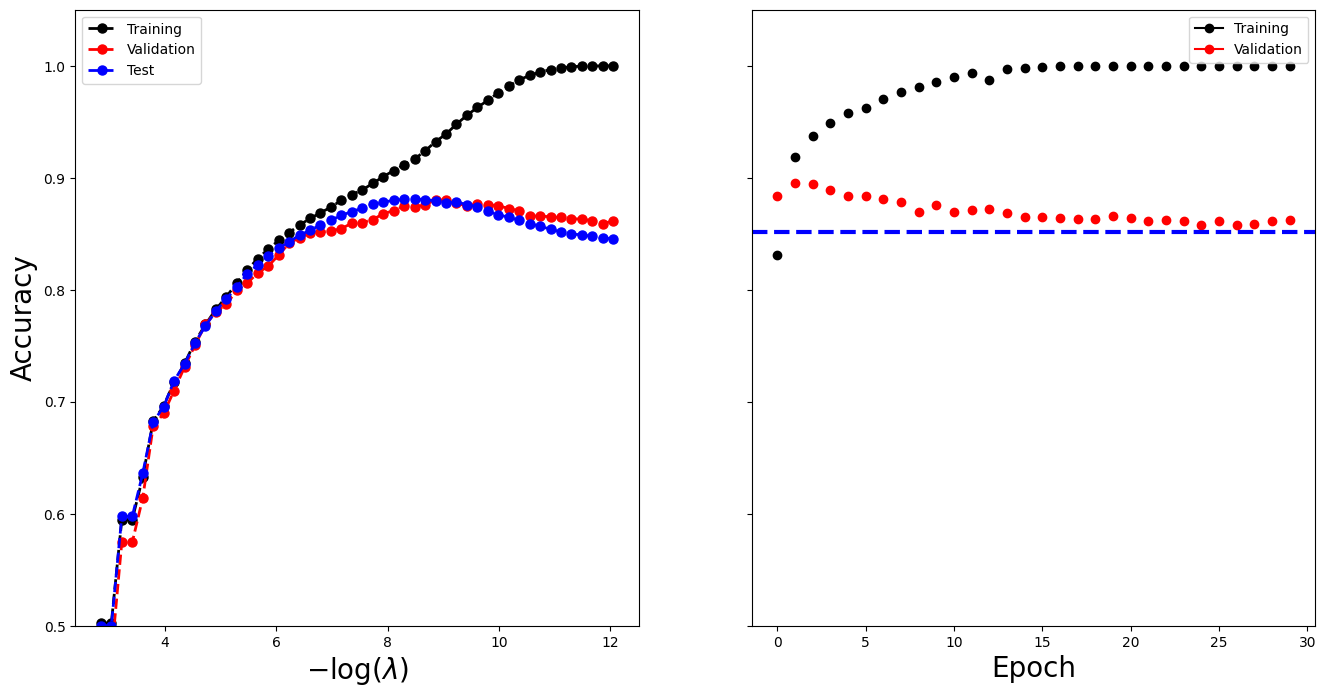

In [58]:
fig #Exibir a figura

Vamos obter o valor da maior acur√°cia do modelo LASSO.

In [59]:
#Melhor acur√°cia
lasso_accuracy = max(np.array([np.mean(Y_ == l) for l in label_.T]))
lasso_accuracy

0.88088

Dos gr√°ficos, √© poss√≠vel observar que a acur√°cia do modelo de regress√£o log√≠stica LASSO √© de 0,88, aproximadamente, assim como para a rede neural.

# **3) Modelo sequencial**

## 3.1) Modelo de redes neurais recorrentes (LSTM)

Por fim, vamos ajustar uma rede neural recorrente (LSTM). √â necess√°rio utilizar a sequ√™ncia de palavras do texto, levando em considera√ß√£o a ordem em que elas aparecem.

Como mais do que 90% das resenhas t√™m menos do que 500 palavras, vamos limitar o tamanho do texto em 500 palavras. Se houver resenhas maiores, vamos utilizar as √∫ltimas 500 palavras e, para textos menores, incluiremos na frente do texto espa√ßos em branco.

In [60]:
#Construir modelo sequencial
imdb_seq_dm = SimpleDataModule(imdb_seq_train, imdb_seq_test,
                               validation = 2000, batch_size = 300,
                               num_workers = min(6, max_num_workers))



*   1¬™ camada da RNN: *embedding layer*, de tamanho 32. Essa camada codifica cada texto como uma matriz de dimens√£o 500 $\times$ 10.003 e mapeia essas 10.003 dimens√µes para 32.
*   2¬™ camada da RNN: LSTM com 32 unidades;
*   Camada de sa√≠da: logit com classifica√ß√£o bin√°ria.

Vamos utilizar o m√©todo ```forward()``` no ajuste.

In [61]:
#Construir as camadas da RNN
class LSTMModel(nn.Module):

  #Inicializar a RNN
  def __init__(self, input_size):
    super(LSTMModel, self).__init__()
    self.embedding = nn.Embedding(input_size, 32)
    self.lstm = nn.LSTM(input_size = 32, hidden_size = 32, batch_first = True)
    self.dense = nn.Linear(32, 1)

  #M√©todo forward
  def forward(self, x):
    val, (h_n, c_n) = self.lstm(self.embedding(x))
    return torch.flatten(self.dense(val[:,-1]))

Vamos ajustar o modelo RNN e observar a sa√≠da (resumo) do modelo, utilizando como exemplo os primeiros 10 textos.

In [62]:
#Ajuste do modelo
lstm_model = LSTMModel(X_test.shape[-1])
#Sa√≠da do modelo
summary(lstm_model, input_data = imdb_seq_train.tensors[0][:10],
        col_names = ['input_size', 'output_size', 'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
LSTMModel                                [10, 500]                 [10]                      --
‚îú‚îÄEmbedding: 1-1                         [10, 500]                 [10, 500, 32]             320,096
‚îú‚îÄLSTM: 1-2                              [10, 500, 32]             [10, 500, 32]             8,448
‚îú‚îÄLinear: 1-3                            [10, 32]                  [10, 1]                   33
Total params: 328,577
Trainable params: 328,577
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 45.44
Input size (MB): 50.00
Forward/backward pass size (MB): 2.56
Params size (MB): 1.31
Estimated Total Size (MB): 53.87

In [63]:
#Ajuste do modelo utilizando o m√≥dulo
lstm_module = SimpleModule.binary_classification(lstm_model)
lstm_logger = CSVLogger('logs', name = 'IMDB_LSTM')

#Utilizar 20 √©pocas no ajuste
lstm_trainer = Trainer(deterministic = True, max_epochs = 20,
                       logger = lstm_logger, callbacks = [ErrorTracker()])
lstm_trainer.fit(lstm_module, datamodule = imdb_seq_dm)

INFO:pytorch_lightning.utilities.rank_zero:üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | LSTMModel         | 328 K  | train
1 | loss  | BCEWithLogitsLoss | 0      | train
----------------------------------------------------
328 K     Trainable params
0         Non-trainable params
328 K     Total params
1.314     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Vamos analisar o desempenho do modelo na base de teste, calculando o valor de sua acur√°cia.

In [64]:
lstm_trainer.test(lstm_module, datamodule = imdb_seq_dm)

Testing: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ        Test metric        ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ       test_accuracy       ‚îÇ    0.8575999736785889     ‚îÇ
‚îÇ         test_loss         ‚îÇ    0.8279176354408264     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

[{'test_loss': 0.8279176354408264, 'test_accuracy': 0.8575999736785889}]

A acur√°cia do modelo √© de, aproximadamente, 85,6%.

Vamos construir o gr√°fico do progresso de aprendizado para esse modelo.

(0.5, 1.0)

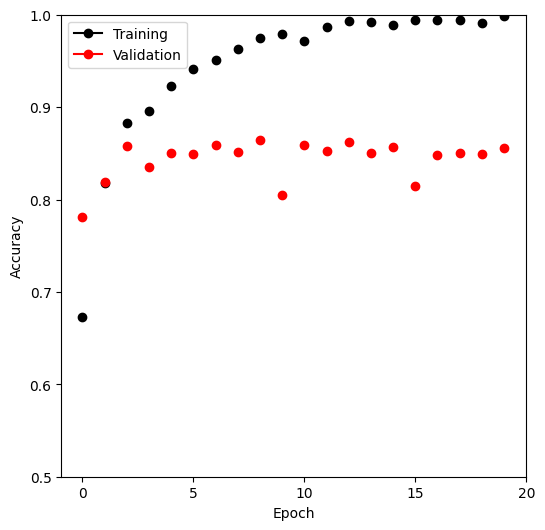

In [65]:
#Construir gr√°fico da acur√°cia
lstm_results = pd.read_csv(lstm_logger.experiment.metrics_file_path)
fig, ax = subplots(1, 1, figsize=(6, 6))
summary_plot(lstm_results, ax, col = 'accuracy', ylabel = 'Accuracy')

ax.set_xticks(np.linspace(0, 20, 5).astype(int))
ax.set_ylabel('Accuracy')
ax.set_ylim([0.5, 1])